In [2]:
# Import packages
import os
import sys
import datetime
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration

In [3]:
# Set date timestamps for historical data download
start_date = datetime.datetime(2010, 1, 1).date()
end_date = datetime.datetime.now().date()
start_date, end_date

(datetime.date(2010, 1, 1), datetime.date(2021, 3, 6))

In [4]:
end_date - start_date

datetime.timedelta(days=4082)

In [5]:
ticker = "GOOGL"
# ticker = "MSFT"
# ticker = "FB"

In [6]:
msft = yf.Ticker(ticker)

msft

yfinance.Ticker object <GOOGL>

In [7]:
msft.info

{'zip': '94043',
 'sector': 'Communication Services',
 'fullTimeEmployees': 135301,
 'longBusinessSummary': 'Alphabet Inc. provides online advertising services in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. The company offers performance and brand advertising services. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, such as ads, Android, Chrome, hardware, Google Maps, Google Play, Search, and YouTube, as well as technical infrastructure; and digital content. The Google Cloud segment offers infrastructure and data analytics platforms, collaboration tools, and other services for enterprise customers. The Other Bets segment sells internet and TV services, as well as licensing and research and development services. The company was founded in 1998 and is headquartered in Mountain View, California.',
 'city': 'Mountain View',
 'phone': '650-253-0000',
 

In [8]:
historical_data = msft.history(start=start_date, end=end_date, interval="1d").reset_index()

historical_data.shape

(2813, 8)

In [9]:
historical_data.head()

Date        Open        High         Low       Close    Volume  \
0 2009-12-31  312.687683  313.013000  310.300293  310.300293   2437160   
1 2010-01-04  313.788788  315.070068  312.432434  313.688690   3908488   
2 2010-01-05  313.903900  314.234222  311.081085  312.307312   6003391   
3 2010-01-06  313.243256  313.243256  303.483490  304.434448   7949443   
4 2010-01-07  305.005005  305.305298  296.621613  297.347351  12815771   

   Dividends  Stock Splits  
0          0           0.0  
1          0           0.0  
2          0           0.0  
3          0           0.0  
4          0           0.0

The above data shows stock prices on per day basis.

+ High: Max stock price on that particular day
+ Low: Lowest price went on that particular day
+ Open: Stock price opening on that particular day
+ Close: Final closing price of the stock on that particular day
+ Volume: Amount of stock traded on that day
+ Dividends: Dividens given (if any)
+ Stock Splits: Stock split happend on that particular day (if any)

In [10]:
historical_data.describe()

Open         High          Low        Close        Volume  \
count  2813.000000  2813.000000  2813.000000  2813.000000  2.813000e+03   
mean    745.942513   752.932888   738.807098   746.104850  3.238266e+06   
std     421.252492   426.351488   416.875397   421.843663  2.589309e+06   
min     219.374374   221.361359   217.032028   218.253250  4.656000e+05   
25%     344.234222   347.802795   341.341339   344.304291  1.530500e+06   
50%     646.469971   655.309998   633.809998   644.030029  2.331067e+06   
75%    1079.040039  1089.569946  1067.079956  1078.829956  4.237558e+06   
max    2107.790039  2145.139893  2093.330078  2118.620117  2.961995e+07   

       Dividends  Stock Splits  
count     2813.0   2813.000000  
mean         0.0      0.000710  
std          0.0      0.037671  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0      1.998000

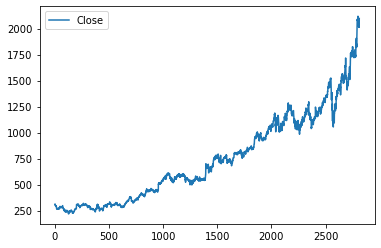

In [11]:
fig = plt.figure()

plt.plot(historical_data.Close)

plt.legend(["Close", "Open"])

# Feature Engineering

In [12]:
historical_data.head()

Date        Open        High         Low       Close    Volume  \
0 2009-12-31  312.687683  313.013000  310.300293  310.300293   2437160   
1 2010-01-04  313.788788  315.070068  312.432434  313.688690   3908488   
2 2010-01-05  313.903900  314.234222  311.081085  312.307312   6003391   
3 2010-01-06  313.243256  313.243256  303.483490  304.434448   7949443   
4 2010-01-07  305.005005  305.305298  296.621613  297.347351  12815771   

   Dividends  Stock Splits  
0          0           0.0  
1          0           0.0  
2          0           0.0  
3          0           0.0  
4          0           0.0

In [13]:
# Create lag features
for i in range(1, 7):
    historical_data[f"Close_lag_{i}"] = historical_data.Close.shift(periods=i, axis=0)
    historical_data[f"Open_lag_{i}"] = historical_data.Open.shift(periods=i, axis=0)
    historical_data[f"High_lag_{i}"] = historical_data.High.shift(periods=i, axis=0)
    historical_data[f"Low_lag_{i}"] = historical_data.Low.shift(periods=i, axis=0)

historical_data.head()

Date        Open        High         Low       Close    Volume  \
0 2009-12-31  312.687683  313.013000  310.300293  310.300293   2437160   
1 2010-01-04  313.788788  315.070068  312.432434  313.688690   3908488   
2 2010-01-05  313.903900  314.234222  311.081085  312.307312   6003391   
3 2010-01-06  313.243256  313.243256  303.483490  304.434448   7949443   
4 2010-01-07  305.005005  305.305298  296.621613  297.347351  12815771   

   Dividends  Stock Splits  Close_lag_1  Open_lag_1  ...  High_lag_4  \
0          0           0.0          NaN         NaN  ...         NaN   
1          0           0.0   310.300293  312.687683  ...         NaN   
2          0           0.0   313.688690  313.788788  ...         NaN   
3          0           0.0   312.307312  313.903900  ...         NaN   
4          0           0.0   304.434448  313.243256  ...     313.013   

    Low_lag_4  Close_lag_5  Open_lag_5  High_lag_5  Low_lag_5  Close_lag_6  \
0         NaN          NaN         NaN         NaN        NaN          NaN   
1         NaN          NaN         NaN         NaN        NaN          NaN   
2         NaN          NaN         NaN         NaN        NaN          NaN   
3         NaN          NaN         NaN         NaN        NaN          NaN   
4  310.300293          NaN         NaN         NaN        NaN          NaN   

   Open_lag_6  High_lag_6  Low_lag_6  
0         NaN         NaN        NaN  
1         NaN         NaN        NaN  
2         NaN         NaN        NaN  
3         NaN         NaN        NaN  
4         NaN         NaN        NaN  

[5 rows x 32 columns]

In [14]:
historical_data.fillna(0, inplace=True)
historical_data.head()

Date        Open        High         Low       Close    Volume  \
0 2009-12-31  312.687683  313.013000  310.300293  310.300293   2437160   
1 2010-01-04  313.788788  315.070068  312.432434  313.688690   3908488   
2 2010-01-05  313.903900  314.234222  311.081085  312.307312   6003391   
3 2010-01-06  313.243256  313.243256  303.483490  304.434448   7949443   
4 2010-01-07  305.005005  305.305298  296.621613  297.347351  12815771   

   Dividends  Stock Splits  Close_lag_1  Open_lag_1  ...  High_lag_4  \
0          0           0.0     0.000000    0.000000  ...       0.000   
1          0           0.0   310.300293  312.687683  ...       0.000   
2          0           0.0   313.688690  313.788788  ...       0.000   
3          0           0.0   312.307312  313.903900  ...       0.000   
4          0           0.0   304.434448  313.243256  ...     313.013   

    Low_lag_4  Close_lag_5  Open_lag_5  High_lag_5  Low_lag_5  Close_lag_6  \
0    0.000000          0.0         0.0         0.0        0.0          0.0   
1    0.000000          0.0         0.0         0.0        0.0          0.0   
2    0.000000          0.0         0.0         0.0        0.0          0.0   
3    0.000000          0.0         0.0         0.0        0.0          0.0   
4  310.300293          0.0         0.0         0.0        0.0          0.0   

   Open_lag_6  High_lag_6  Low_lag_6  
0         0.0         0.0        0.0  
1         0.0         0.0        0.0  
2         0.0         0.0        0.0  
3         0.0         0.0        0.0  
4         0.0         0.0        0.0  

[5 rows x 32 columns]

In [15]:
historical_data.drop(
    columns=["Dividends", "Stock Splits", "Volume", "Open", "High", "Low"], inplace=True)

In [16]:
# # Create a holiday dataframe
# min_date, max_date = historical_data.Date.min(), historical_data.Date.max()
# print("Min/Max dates:", min_date, max_date)

# date_range = pd.date_range(start=min_date, end=max_date)
# print("Date range:", date_range.min(), date_range.max())

# # Find dates not present in historical df - closed stock market holiday
# holiday_date_range = [d.date() for d in date_range if d not in historical_data.Date]
# holiday_date_range[:5]

In [17]:
# holidays = pd.DataFrame({
#     "holiday": "shutdown",
#     "ds": pd.to_datetime(holiday_date_range),
#     "lower_bound": 0,
#     "upper_bound": 1,
# })

# holidays.head()

# Modelling

## Facebook's Prophet: Single Timestep Forecasting

References: 
+ https://facebook.github.io/prophet/

In [19]:
import fbprophet as prophet


In [20]:
validation_period = 30 # 30 days

train, validation = historical_data.iloc[:-validation_period], historical_data.iloc[-validation_period:]

train.shape, validation.shape

((2783, 26), (30, 26))

In [21]:
train.head()

Date       Close  Close_lag_1  Open_lag_1  High_lag_1   Low_lag_1  \
0 2009-12-31  310.300293     0.000000    0.000000    0.000000    0.000000   
1 2010-01-04  313.688690   310.300293  312.687683  313.013000  310.300293   
2 2010-01-05  312.307312   313.688690  313.788788  315.070068  312.432434   
3 2010-01-06  304.434448   312.307312  313.903900  314.234222  311.081085   
4 2010-01-07  297.347351   304.434448  313.243256  313.243256  303.483490   

   Close_lag_2  Open_lag_2  High_lag_2   Low_lag_2  ...  High_lag_4  \
0     0.000000    0.000000    0.000000    0.000000  ...       0.000   
1     0.000000    0.000000    0.000000    0.000000  ...       0.000   
2   310.300293  312.687683  313.013000  310.300293  ...       0.000   
3   313.688690  313.788788  315.070068  312.432434  ...       0.000   
4   312.307312  313.903900  314.234222  311.081085  ...     313.013   

    Low_lag_4  Close_lag_5  Open_lag_5  High_lag_5  Low_lag_5  Close_lag_6  \
0    0.000000          0.0         0.0         0.0        0.0          0.0   
1    0.000000          0.0         0.0         0.0        0.0          0.0   
2    0.000000          0.0         0.0         0.0        0.0          0.0   
3    0.000000          0.0         0.0         0.0        0.0          0.0   
4  310.300293          0.0         0.0         0.0        0.0          0.0   

   Open_lag_6  High_lag_6  Low_lag_6  
0         0.0         0.0        0.0  
1         0.0         0.0        0.0  
2         0.0         0.0        0.0  
3         0.0         0.0        0.0  
4         0.0         0.0        0.0  

[5 rows x 26 columns]

### Train and Forecast

In [22]:
lag_features = [col for col in historical_data.columns if "lag" in col]

In [23]:
model = prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, seasonality_mode="additive")
for name in lag_features:
    model.add_regressor(name)

model.fit(df=train.rename(columns={"Date": "ds", "Close":"y"}))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
forecast = model.predict(validation[[col for col in validation.columns if col != "Close"]].rename(columns={"Date": "ds"}))

forecast.shape

(30, 94)

In [25]:
forecast.head(10)

ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2021-01-22  704.912795  1865.201063  1903.761893   704.912795   704.912795   
1 2021-01-25  705.016167  1862.776660  1901.451734   705.016167   705.016167   
2 2021-01-26  705.050625  1857.135617  1893.840379   705.050625   705.050625   
3 2021-01-27  705.085082  1877.683556  1914.449884   705.085082   705.085082   
4 2021-01-28  705.119539  1787.405980  1822.892121   705.119539   705.119539   
5 2021-01-29  705.153997  1837.674301  1875.338765   705.153997   705.153997   
6 2021-02-01  705.257368  1795.136717  1832.943720   705.257368   705.257368   
7 2021-02-02  705.291826  1875.979623  1914.325237   705.291826   705.291826   
8 2021-02-03  705.326283  1897.529479  1933.618279   705.326283   705.326283   
9 2021-02-04  705.360740  2025.975948  2063.105183   705.360740   705.360740   

   Close_lag_1  Close_lag_1_lower  Close_lag_1_upper  Close_lag_2  ...  \
0   396.856094         396.856094         396.856094   -86.310950  ...   
1   399.752174         399.752174         399.752174   -86.617428  ...   
2   400.344463         400.344463         400.344463   -87.249153  ...   
3   405.051838         405.051838         405.051838   -87.378350  ...   
4   374.400348         374.400348         374.400348   -88.405175  ...   
5   386.198126         386.198126         386.198126   -81.719130  ...   
6   377.299875         377.299875         377.299875   -84.292593  ...   
7   399.927759         399.927759         399.927759   -82.351607  ...   
8   408.898354         408.898354         408.898354   -87.287453  ...   
9   457.026073         457.026073         457.026073   -89.244220  ...   

      weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0  67.280256     67.280256     67.280256  1.973269      1.973269   
1  67.113933     67.113933     67.113933  1.183876      1.183876   
2  67.758028     67.758028     67.758028  0.943663      0.943663   
3  68.530994     68.530994     68.530994  0.720985      0.720985   
4  67.851457     67.851457     67.851457  0.518840      0.518840   
5  67.280256     67.280256     67.280256  0.339695      0.339695   
6  67.113933     67.113933     67.113933 -0.043860     -0.043860   
7  67.758028     67.758028     67.758028 -0.118248     -0.118248   
8  68.530994     68.530994     68.530994 -0.166396     -0.166396   
9  67.851457     67.851457     67.851457 -0.189514     -0.189514   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0      1.973269                   0.0                         0.0   
1      1.183876                   0.0                         0.0   
2      0.943663                   0.0                         0.0   
3      0.720985                   0.0                         0.0   
4      0.518840                   0.0                         0.0   
5      0.339695                   0.0                         0.0   
6     -0.043860                   0.0                         0.0   
7     -0.118248                   0.0                         0.0   
8     -0.166396                   0.0                         0.0   
9     -0.189514                   0.0                         0.0   

   multiplicative_terms_upper         yhat  
0                         0.0  1883.901145  
1                         0.0  1882.808562  
2                         0.0  1874.525485  
3                         0.0  1895.628559  
4                         0.0  1804.957293  
5                         0.0  1856.711255  
6                         0.0  1814.288148  
7                         0.0  1895.378946  
8                         0.0  1916.064407  
9                         0.0  2044.940651  

[10 rows x 94 columns]

### Visualize forecasts

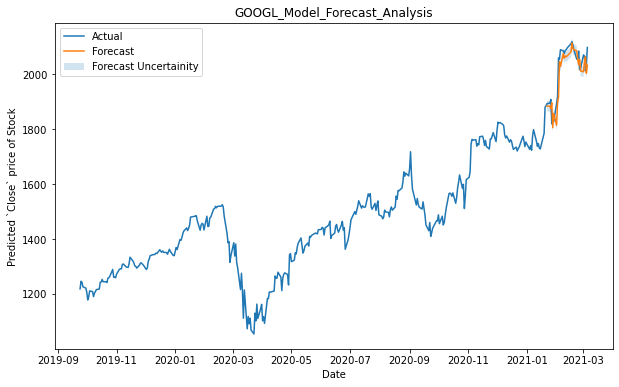

In [26]:
# Plotting predictions and uncertainity interval with respect to actuals
fig = plt.figure(figsize=(10, 6))

# Plot actuals
plt.plot(historical_data.Date.iloc[-365:], historical_data.Close.iloc[-365:])

# Plot forecasts for the latest 365 days as validation period
plt.plot(forecast.ds, forecast.yhat)

# Plot uncertainity - lower and upper bound for the forecasts
plt.fill_between(forecast.ds, forecast.yhat_lower, forecast.yhat_upper, alpha=0.2)

plt.xlabel("Date")
plt.ylabel("Predicted `Close` price of Stock")
plt.legend(["Actual", "Forecast", "Forecast Uncertainity"])
plt.title(f"{ticker}_Model_Forecast_Analysis")
plt.show()

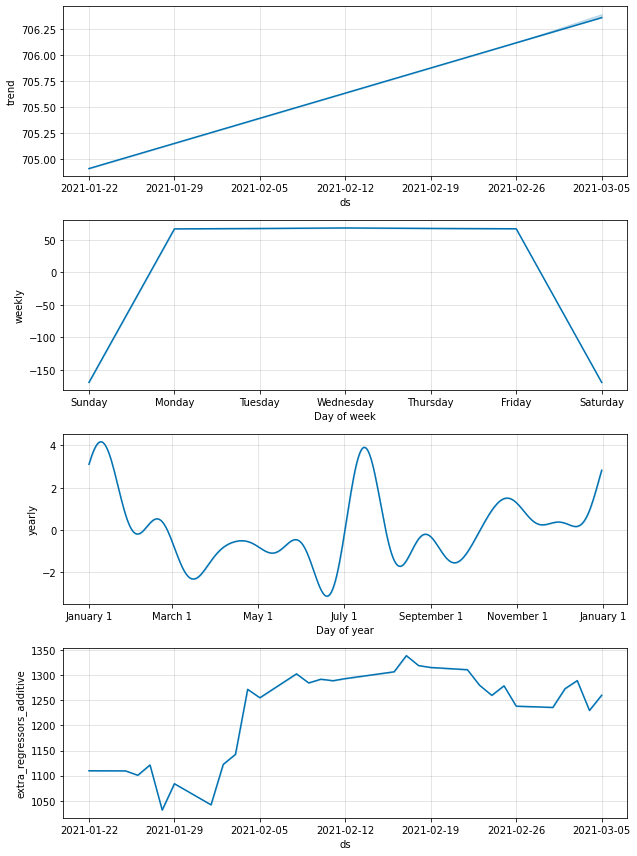

In [27]:
fig = model.plot_components(forecast)

In [29]:
forecast[['ds','yhat']]

ds         yhat
0  2021-01-22  1883.901145
1  2021-01-25  1882.808562
2  2021-01-26  1874.525485
3  2021-01-27  1895.628559
4  2021-01-28  1804.957293
5  2021-01-29  1856.711255
6  2021-02-01  1814.288148
7  2021-02-02  1895.378946
8  2021-02-03  1916.064407
9  2021-02-04  2044.940651
10 2021-02-05  2027.615397
11 2021-02-08  2075.248370
12 2021-02-09  2057.955247
13 2021-02-10  2066.198489
14 2021-02-11  2062.676651
15 2021-02-12  2066.440125
16 2021-02-16  2080.837833
17 2021-02-17  2113.857380
18 2021-02-18  2093.478533
19 2021-02-19  2089.115751
20 2021-02-22  2084.500238
21 2021-02-23  2054.071256
22 2021-02-24  2034.699868
23 2021-02-25  2052.921446
24 2021-02-26  2011.725374
25 2021-03-01  2008.670900
26 2021-03-02  2046.488897
27 2021-03-03  2063.225531
28 2021-03-04  2002.930436
29 2021-03-05  2032.540435

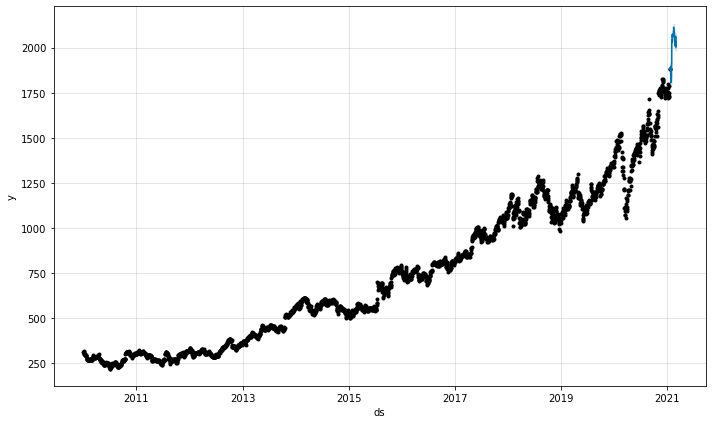

In [31]:
plot1 = model.plot(forecast)

### Evaluate model performance

In [26]:
# General metrics
from sklearn.metrics import mean_absolute_error

# Mean absolute error metric
def mae(y, yhat):
    return mean_absolute_error(y, yhat)

In [27]:
validation.Date.min(), validation.Date.max()

(Timestamp('2020-07-13 00:00:00'), Timestamp('2020-08-21 00:00:00'))

In [28]:
forecast.ds.min(), forecast.ds.max()

(Timestamp('2020-07-13 00:00:00'), Timestamp('2020-08-21 00:00:00'))

In [29]:
"Mean absolute error (Closing price of the stock) = ", mae(validation.Close, forecast.yhat)

('Mean absolute error (Closing price of the stock) = ', 17.75032078404112)